### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

### Defining the DBSCAN Function

In [2]:
def DBSCAN(X, eps, min_samples):
    Labels = np.zeros(X.shape[0]) # 0 represents the unclustered points
    Cluster_ID = 0

    for i in range(X.shape[0]):
        if Labels[i] != 0:
            continue

        Neighbors = []
        for j in range(X.shape[0]):
            if np.linalg.norm(X[i] - X[j]) <= eps:
                Neighbors.append(j)

        if len(Neighbors) < min_samples:
            Labels[i] = -1  # -1 represents the outlayers
        else:
            Cluster_ID += 1
            Labels[i] = Cluster_ID

            for Neighbor in Neighbors:
                if Labels[Neighbor] == 0:
                    Labels[Neighbor] = Cluster_ID
                    New_Neighbors = []
                    for k in range(X.shape[0]):
                        if np.linalg.norm(X[Neighbor] - X[k]) <= eps:
                            New_Neighbors.append(k)

                    if len(New_Neighbors) >= min_samples:
                        Neighbors += New_Neighbors

                if Labels[Neighbor] == -1:
                    Labels[Neighbor] = Cluster_ID

    return Labels

### Loading and Preprocessing the Data

In [ ]:
# Load the MNIST dataset and remove it's labels
(X_Train, _), (_, _) = mnist.load_data()

# Limit the number of samples to 3000
Limit = 3000
Data = X_Train[:Limit]

# Reshape the data to be a 1D array
Reshaped_Data = Data.reshape((Limit, -1))

# Normalize the data
Normalized_Data = Reshaped_Data / 255.0

### Applying the DBSCAN clustering algorithm on the dataset without reducing it's dimensionality by PCA

In [4]:
# DBSCAN parameters
Eps = 6
Min_Samples = 6

# Apply DBSCAN on the normalized data
Before_PCA_Labels = DBSCAN(Normalized_Data, eps=Eps, min_samples=Min_Samples)

# Print the labels of the resulting clusters
print("Labels:", Before_PCA_Labels)

# Print the number of clusters and outliers
Clusters = len(np.unique(Before_PCA_Labels)) - 1
Outliers = np.sum(Before_PCA_Labels == -1)

print(f"Number of Clusters Before PCA: {Clusters}")
print(f"Number of Outliers Before PCA: {Outliers}")

Labels: [-1.  1. -1. ...  2.  2.  2.]
Number of Clusters Before PCA: 9
Number of Outliers Before PCA: 961


### Plotting the Clustering Results

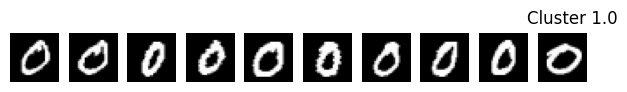

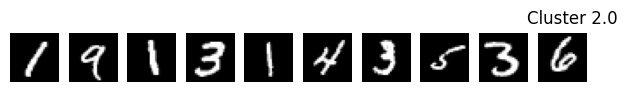

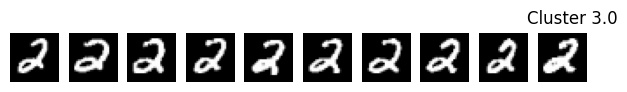

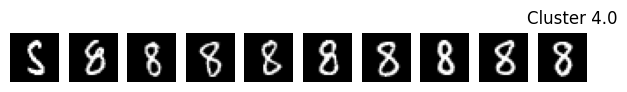

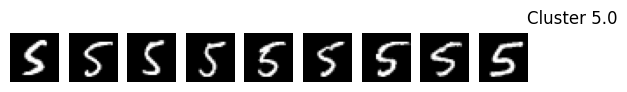

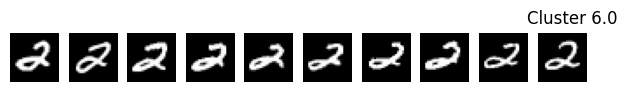

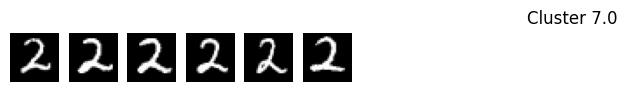

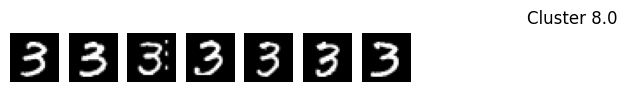

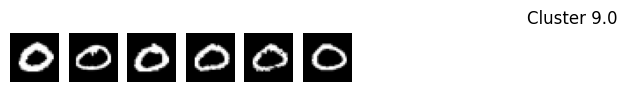

In [5]:
# Display images in each cluster
unique_labels = np.unique(Before_PCA_Labels)
unique_labels = unique_labels[unique_labels != -1]  # Exclude noise points

for label in unique_labels:
    cluster_indices = np.where(Before_PCA_Labels == label)[0]

    plt.figure(figsize=(15, 1))
    for i, idx in enumerate(cluster_indices[:10]):
        plt.subplot(1, 20, i + 1)
        plt.imshow(Data[idx], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Cluster {label}')
    plt.show()

### Applying the DBSCAN clustering algorithm on the dataset after reducing it's dimensinality by PCA

In [6]:
# Calculating the shifted mean
Shifted_Mean = Reshaped_Data - np.mean(Reshaped_Data)

# Computing the Covariance Matrix
Cov_Matrix = np.dot(Shifted_Mean, Shifted_Mean.T) * (1/Shifted_Mean.shape[0])

# Computing the Eigenvectors and the Eigenvalues
Eigenvalues, Eigenvectors = np.linalg.eigh(Cov_Matrix)

# Sorting the Eigenvectors by the Eigenvalues in descending order
SortedIndices = np.argsort(Eigenvalues)[::-1]
Eigenvectors = Eigenvectors[:, SortedIndices]

# Normalizing the eigen vectors
Normalized_Eigenvectors = Eigenvectors / np.linalg.norm(Eigenvectors, axis = 1)[:, np.newaxis]

# Transposing the Normalized Eigenvectors to form the Q matrix
Q_Matrix = Normalized_Eigenvectors.T

# Choosing the first 350 columns of the Q matrix
Q_Matrix = Q_Matrix[0:350]

# Computing the Feature Vector
FeatureVector = np.dot(Q_Matrix ,Shifted_Mean)

# Reconstructing the Image after the Reduction Process
CompressedImage = np.dot(Q_Matrix.T, FeatureVector).T + np.mean(Data)

In [7]:
# DBSCAN parameters
Eps = 6
Min_Samples = 6

# Apply DBSCAN on the reconstructed (compressed) image
After_PCA_Labels = DBSCAN(CompressedImage, eps = Eps, min_samples = Min_Samples)

# Print the labels of the resulting clusters
print("Labels:", After_PCA_Labels)

# Print the number of clusters and outliers
clusters = len(np.unique(After_PCA_Labels)) - 1
outliers = np.sum(After_PCA_Labels == -1)

print(f"Number of Clusters After PCA: {clusters}")
print(f"Number of Outliers After PCA: {outliers}")

Labels: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

### Plotting the Clustering Results

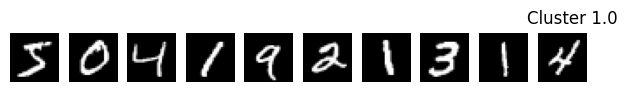

In [8]:
# Display images in each cluster
unique_labels = np.unique(After_PCA_Labels)
unique_labels = unique_labels[unique_labels != -1]  # Exclude noise points

for label in unique_labels:
    cluster_indices = np.where(After_PCA_Labels == label)[0]

    plt.figure(figsize=(15, 1))
    for i, idx in enumerate(cluster_indices[:10]):
        plt.subplot(1, 20, i + 1)
        plt.imshow(Data[idx], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Cluster {label}')
    plt.show()

### **Conclusion:**
#### After applying the DBSCAN clustering algorithm on a sample of 3000 images from the MNIST dataset, we observed notable differences in clustering performance before and after the application of Principal Component Analysis (PCA).
#### Without PCA, the algorithm successfully identified 9 distinct clusters, effectively capturing the diversity of the digit images. In contrast, after applying PCA, the algorithm converged to a single cluster, indicating a loss of granularity in the clustering process
#### While PCA significantly expedited the clustering due to dimensionality reduction, it also impacted the effectiveness of the clustering results. This highlights the importance of considering the trade-offs between computational efficiency and the quality of clustering outcomes.
#### To enhance clustering results, it is essential to experiment with different Q-Matrices and adjust the algorithm's parameters, epsilon and the minimum number of samples. By fine-tuning these values, we can potentially achieve more satisfactory clustering results that better reflect the inherent structure of the data.